In [97]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

#silencing warnings and other rubbish
import warnings
warnings.filterwarnings("ignore")

Uploading appropriate dataset

In [99]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data
y = mnist.target

# 1. Use PCA to reduce the dimensionality
## a. How many components did you use? Why?
 I used 153 components, because 153 out of 784 components explains 95% of the variance in our data. This means that 19.5% of our data contains 95% of the information that our dataset contains. However, looking at the graphs below, it looks like we can see an elbow in our data retention closer 85% of our data, which is contained in 75 components. However, we give up about 10% of our explanatory power with 1/2 of the components in the 95% explanation rate, so I think it is more worthwhile to go with the 153 components.

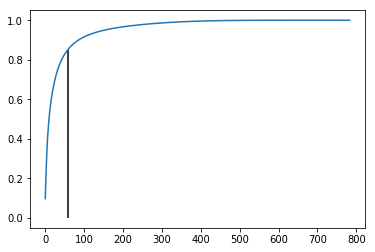

In [3]:
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio);
plt.vlines(ymin=0,ymax=cum_ratio[58],x=58);

In [4]:
eighty_five = np.argmax(cum_ratio >= 0.85)
print(eighty_five)
print(cum_ratio[eighty_five])

58
0.8508247062781695


In [5]:
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)

In [6]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 154)


In [7]:
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)

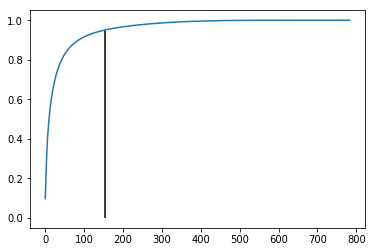

In [8]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio);
plt.vlines(ymin=0,ymax=cum_ratio[154],x=154);

## b. Plot the first two components. Do you notice any trends? What is this plot showing us?

On the large scatterplot below, we can see the two elements with the most variance plotted. On the horizontal plane, we can see a huge spread from left to right in our data. Similarly in the vertical dimension, we see a large spread (though it has a slightly smaller range). This is consistent with the notion that the first principle component will hold the most information, and will thus have the largest variance. The second component will follow this trend and have the second most variation (and thus second most information). 

In [9]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)
X_2dim.shape

(70000, 2)

In [10]:
#variance explained by two components
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

We can see that a massive amount of information (17%) is captured by two components, so let's plot out the compression curve to see what the optimal number of components is:

<Figure size 432x288 with 0 Axes>

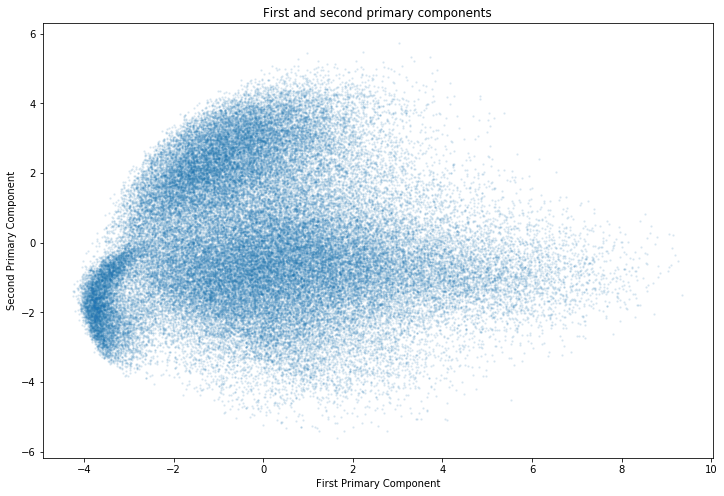

In [11]:
fig = plt.figure()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
x = X_2dim[:,0]
y = X_2dim[:,1]
points = X_2dim[:,2:4]
# color is the length of each vector in `points`
color = np.sqrt((points**2).sum(axis = 1))/np.sqrt(2.0)
rgb = plt.get_cmap('jet')(color)
ax.scatter(x, y, s=2, alpha=.1)
plt.xlabel('First Primary Component')
plt.ylabel('Second Primary Component')
plt.title('First and second primary components')
plt.show();

## c. Why would you use PCA? What is it doing? And what are the drawbacks?
The only drawback to using PCA is that you lose data, but that is the entire point of the process: to compress information by retaining the components with the most information. PCA does have limitations  and is not useful in every circumstance-- the first and most important being that the principle components are linear combination of the original data. By using PCA, we are assuming that this assumption is valid. Without it, our prediction will not produce the desired compressed results.

# d. Plot some of the images, then compress them using PCA and plot again. How does it look?

In [12]:
pca = PCA(n_components=784)
X_2dim = pca.fit_transform(X)
X_2dim.shape

(70000, 784)

In [13]:
def pcaplotter(components1, components2, imagenumber):
    fig = plt.figure(figsize=(15,8))

    #original image
    plt.subplot(1, 3, 1);
    plt.imshow(X[imagenumber].reshape((28,28)), cmap='Greys');
    plt.xlabel('All components', fontsize=11)
    plt.title('100 Percent', fontsize = 13);

    #reduced image
    plt.subplot(1, 3, 2);
    pca = PCA(n_components=components1)
    reduced_image = pca.fit_transform(X)
    revert_image = pca.inverse_transform(reduced_image)
    plt.imshow(revert_image[imagenumber].reshape((28,28)), cmap='Greys');
    plt.xlabel('%i components' %components1, fontsize=11)
    plt.title('95 Percent of info', fontsize = 13);

    #reduced image
    plt.subplot(1, 3, 3);
    pca = PCA(n_components=components2)
    reduced_image = pca.fit_transform(X)
    revert_image = pca.inverse_transform(reduced_image)
    plt.imshow(revert_image[imagenumber].reshape((28,28)), cmap='Greys');
    plt.xlabel('%i components' %components2, fontsize=11)
    plt.title('Very reduced quality', fontsize = 13);

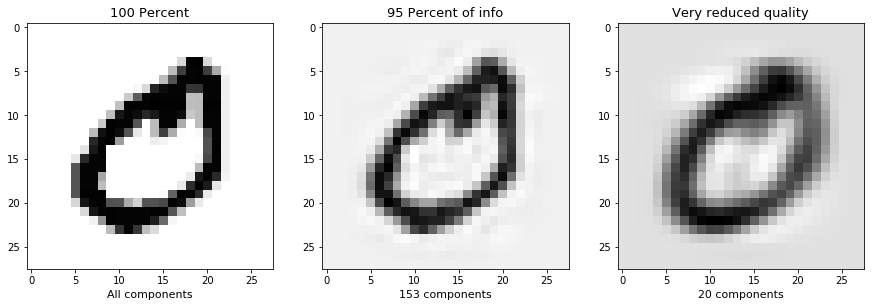

In [14]:
pcaplotter(153, 20, 1)

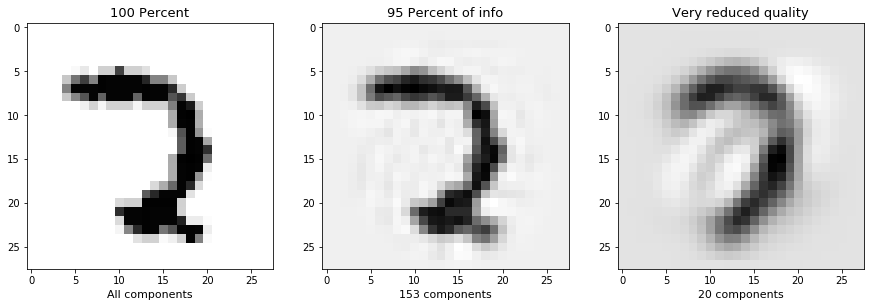

In [15]:
pcaplotter(153, 20, 17000)

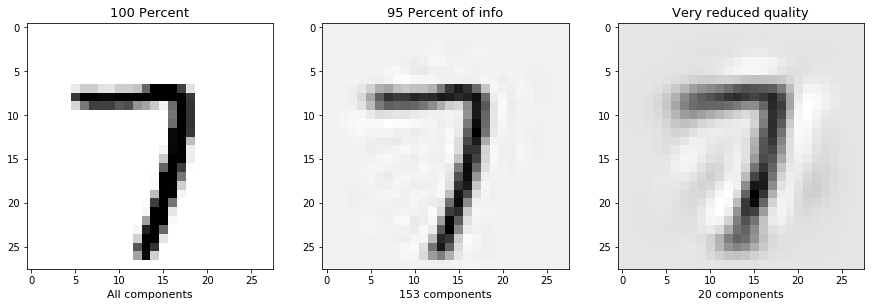

In [16]:
pcaplotter(153, 20, 47000)

# 2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):


## a. How does this plot differ from your PCA plot? 

In [54]:
y= mnist.target
#first reduce dimensionality before feeding to t-sne
def tsnereducer1(perp1, lrate, iterations):
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X)

    rows = np.arange(70000)
    np.random.shuffle(rows)
    n_select = 10000

    tsne = TSNE(n_components=2, verbose=1, perplexity=perp1, n_iter=iterations, learning_rate=lrate)
    tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

    df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
    df_tsne['label'] = y[rows[:n_select]]
    plt.figure(figsize=(8,8))
    sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
    plt.title("First Two Components, Perplexity = %i" %perp1, fontsize=15)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.032s...
[t-SNE] Computed neighbors for 10000 samples in 10.182s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.108757
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.108833
[t-SNE] KL divergence after 1000 iterations: 1.917825


<Figure size 576x576 with 0 Axes>

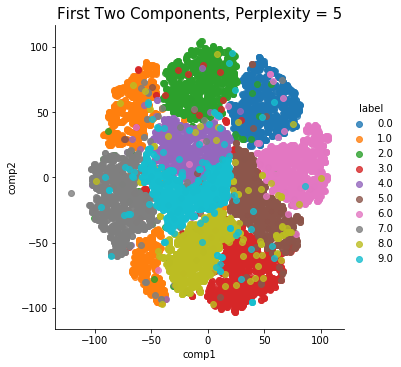

In [55]:
tsnereducer1(5,200,1000)

This plot differs from the PCA plot because it is beginning to classify the images by their attributes. Instead of looking at variance (like in the PCA scatter), we can now see how the various classes of drawing are classified by T-SNE. 

## b. How robust is it to changes in perplexity?

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.032s...
[t-SNE] Computed neighbors for 10000 samples in 13.435s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.719002
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.839500
[t-SNE] KL divergence after 1000 iterations: 1.752430


<Figure size 576x576 with 0 Axes>

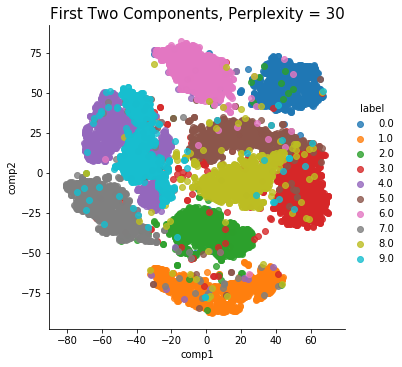

In [56]:
tsnereducer1(30,200,1000)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.033s...
[t-SNE] Computed neighbors for 10000 samples in 12.436s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.913936
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.181618
[t-SNE] KL divergence after 1000 iterations: 1.684697


<Figure size 576x576 with 0 Axes>

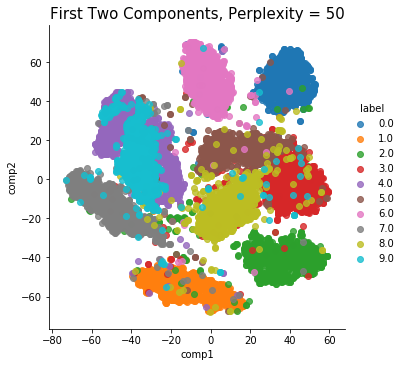

In [57]:
tsnereducer1(50,200,1000)

Increases in perplexity caused the clusters to separate from each other. This leads me to believe that the top limit of 50 perplexity will allow us to make the best classifications for our data. So no, T-SNE does not appear to be robust to perplexity as increases or decreases can create different visualizations of the data. 

## c. How robust is it to different learning rate and number of iterations?

In [58]:
y= mnist.target
def tsnereducer2(perp1, lr, stepnum):
    #setting number of components equal to the number needed to retain 95% of information
    pca = PCA(n_components=154)
    reduced_image = pca.fit_transform(X)
    
    #get random sample of images
    imageselections = np.arange(70000)
    np.random.shuffle(imageselections)
    randomsample = 10000
   
    #setting up t-sne plot
    tsne = TSNE(n_components=2,  verbose=1, perplexity=perp1,  learning_rate=lr, n_iter=stepnum)
    tsneoutcome = tsne.fit_transform(reduced_image[imageselections[:randomsample],:])
    tsnedf = pd.DataFrame(tsneoutcome, columns=['componentone', 'componenttwo'])
    tsnedf['label'] = y[imageselections[:randomsample]]
    
    #plotting
    plt.figure(figsize=(8,8))
    sns.lmplot(x='componentone', y='componenttwo', data=tsnedf, hue='label', fit_reg=False)
    plt.title("First Two Components, Iterations = %i" %stepnum, fontsize=15)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.153s...
[t-SNE] Computed neighbors for 10000 samples in 36.676s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.153968
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.158348
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704

<Figure size 576x576 with 0 Axes>

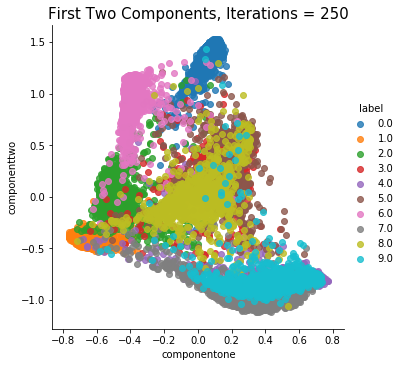

In [59]:
tsnereducer2(50,200,250)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.116s...
[t-SNE] Computed neighbors for 10000 samples in 35.669s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.156576
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.118378
[t-SNE] KL divergence after 500 iterations: 1.920791


<Figure size 576x576 with 0 Axes>

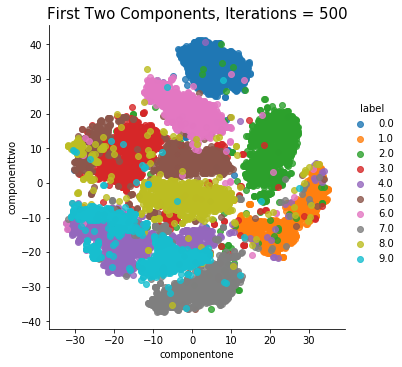

In [60]:
tsnereducer2(50,200,500)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.165s...
[t-SNE] Computed neighbors for 10000 samples in 36.202s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.158598
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.580063
[t-SNE] KL divergence after 1200 iterations: 1.722040


<Figure size 576x576 with 0 Axes>

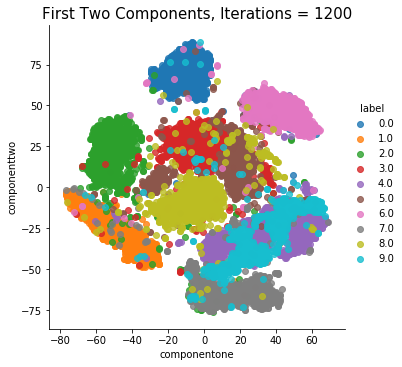

In [61]:
tsnereducer2(50,200,1200)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.113s...
[t-SNE] Computed neighbors for 10000 samples in 35.448s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.148211
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.146408
[t-SNE] KL divergence after 2000 iterations: 1.672714


<Figure size 576x576 with 0 Axes>

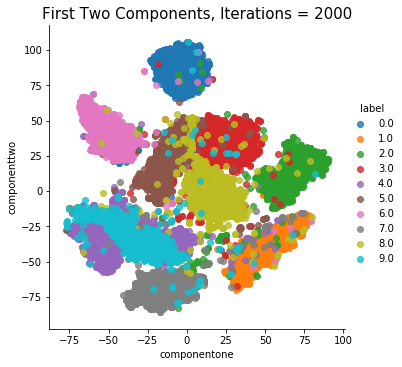

In [62]:
tsnereducer2(50,200,2000)

Increases in the iteration count allowed the algorithm to improve in its ability to make distinctions. I would need to chart some learning curves, but it appears to me that increasing iterations even further would improve the quality of the algorithm. Decreases in iterations have an adverse effect on the model, so it appears that it is not very robust to iteration changes.

# 3. Perform k-means clustering:

## a. How did you choose k?



K was chosen by the number of digits we want to identify -- 0-9, so ten. 

## b. How did you evaluate your clustering?

In [64]:
y = mnist.target
x = mnist.data

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=10, n_init=50)
kmeans.fit(x)
labels = kmeans.labels_
silhouette_score(x, labels, metric='euclidean')

0.058702643064346194

I chose to use a silhoutte score because it is a numeric representation of how well each point was classified to its cluster, or from the main density of its assigned cluster. Because the score ranges from -1 to 1 with 1 being the best score, it appears that my clustering is fairly weak with a score of 0.058. 

## c. Visualize your clusters using t-sne

In [73]:
def kmeansclustergraph(perp1, iters, lrate):
    #shuffle the observations for each call of the function
    rows = np.arange(70000)
    np.random.shuffle(rows)
    n_select = 10000
    tsne = TSNE(n_components = 2, verbose = 1, perplexity = perp1, n_iter = iters, learning_rate = lrate)
    tsneoutcome = tsne.fit_transform(x[rows[:n_select],:])

    tsnedf = pd.DataFrame(tsneoutcome, columns=['comp1', 'comp2'])
    tsnedf['label'] = labels[rows[:n_select]]

    sns.lmplot(x='comp1', y='comp2', data=tsnedf, hue='label', fit_reg=False)
    plt.title('K-Means Clustering through TSNE')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.243s...
[t-SNE] Computed neighbors for 10000 samples in 126.273s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 444.145475
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.013611
[t-SNE] KL divergence after 500 iterations: 1.936459


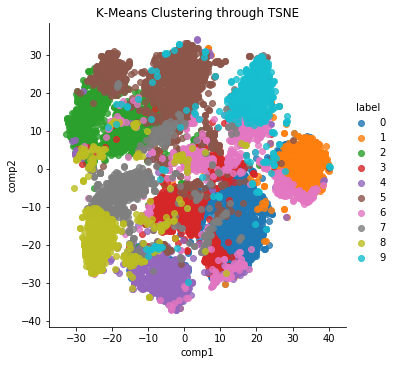

In [74]:
kmeansclustergraph(50,500,200)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.198s...
[t-SNE] Computed neighbors for 10000 samples in 126.218s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 476.216436
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.534058
[t-SNE] KL divergence after 500 iterations: 1.930365


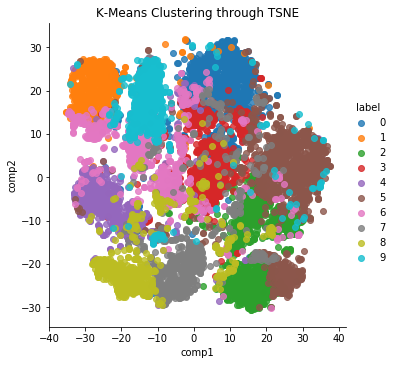

In [75]:
kmeansclustergraph(50,500,200)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.264s...
[t-SNE] Computed neighbors for 10000 samples in 126.640s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 475.488663
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.817802
[t-SNE] KL divergence after 500 iterations: 1.958696


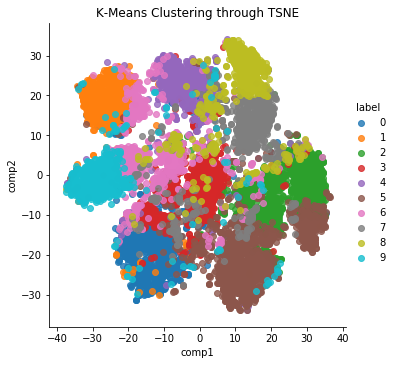

In [76]:
kmeansclustergraph(50,500,200)

## d. Did you scale your data?

No. As we learned in lecture, because the K-Means uses clusters and Euclidian distance to determine which group contains which observations, scaling the data would fundamentally change that metric, altering how our algorithm classifies our observations into the k=10 means.

## e. How robust is your clustering?



As you can see in part C (in which I called the randomly shuffling function 3 separate times), the results appeared to be robust with different subsets of our data. The KL divergence after 500 iterations was within +/-0.02, so I take that to be relatively good. 

# 4. Perform hierarchical clustering:

## a. Plot your dendrogram

Text(0.5, 1.0, 'Complete Linkage')

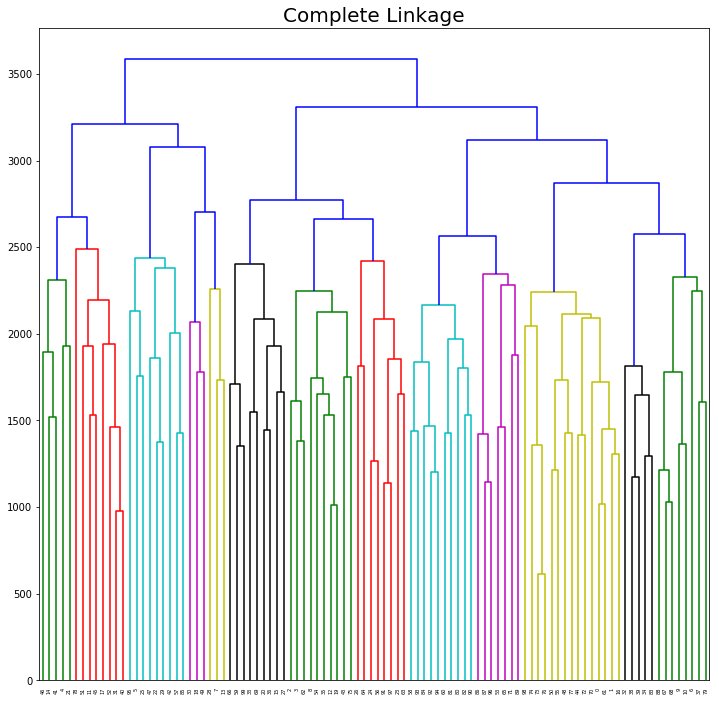

In [92]:
x_set = x[:100]

Z = linkage(x_set, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Complete Linkage', fontsize = 20)

Text(0.5, 1.0, 'Single Linkage')

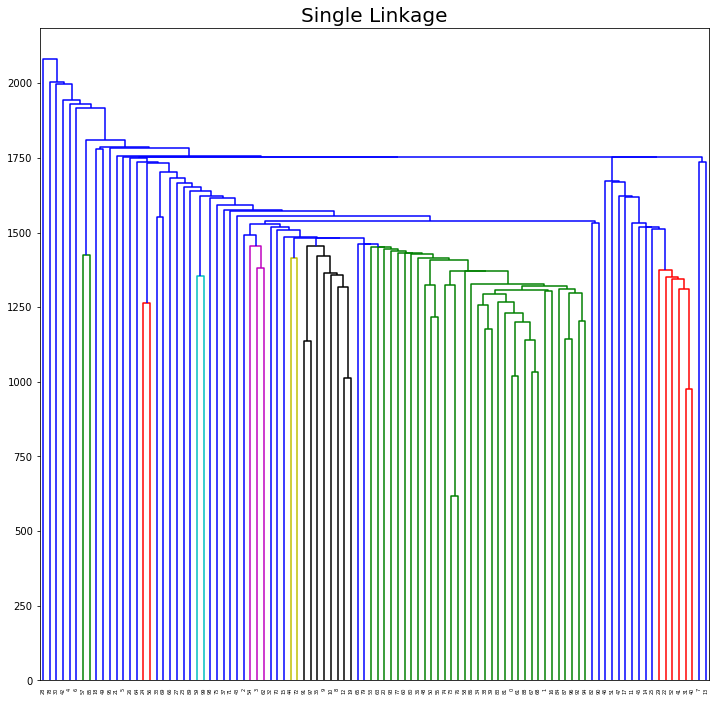

In [93]:
x_set = x[:100]

Z = linkage(x_set, 'single')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Single Linkage', fontsize = 20)

Text(0.5, 1.0, 'Ward Linkage')

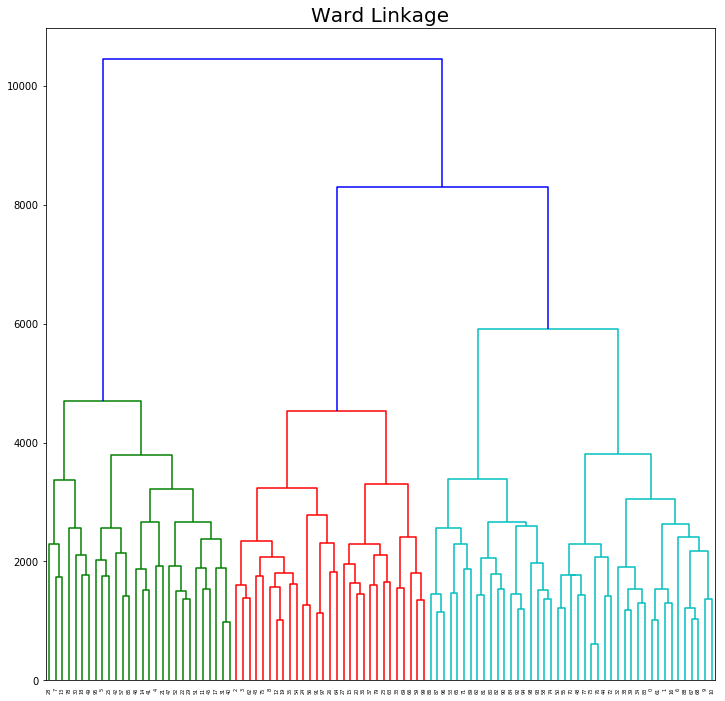

In [94]:
Z = linkage(x_set, 'ward')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Ward Linkage', fontsize = 20)

Text(0.5, 1.0, 'Average Linkage')

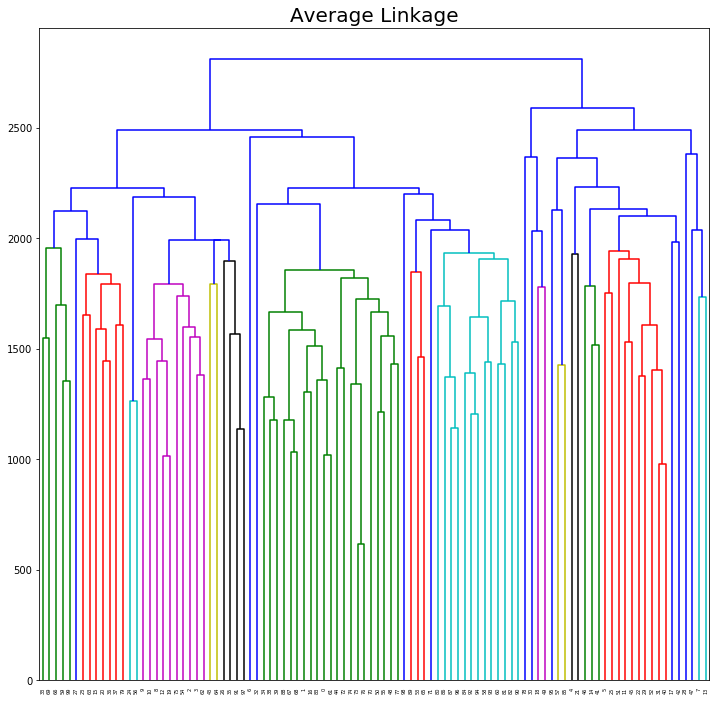

In [95]:
Z = linkage(x_set, 'average')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Average Linkage', fontsize = 20)

Text(0.5, 1.0, 'Centroid Linkage')

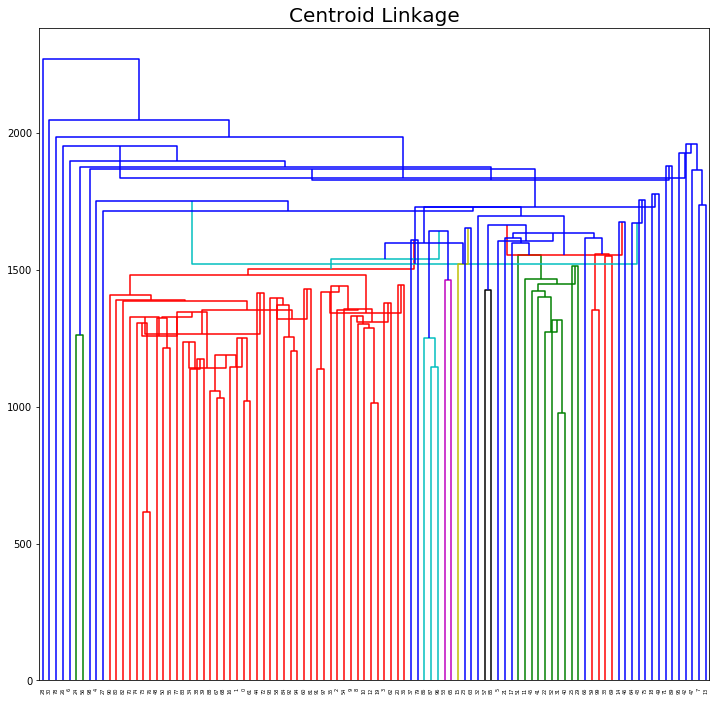

In [96]:
Z = linkage(x_set, 'centroid')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Centroid Linkage', fontsize = 20)

## b. How many clusters seem reasonable based off your graph?

It seems to me that the most reasonable number of clusters would be just over ten. 13 is the number in the complete linkage method, and that is closest to the truth, so 13 would probably make the most sense. In context of the K-Means clusters where many observations are classified incorrectly in the midst of their correct cluster, this makes sense. Some numbers were drawn so terribly from the others that they no longer appear to fit in that cluster. 

## c. How does your dendrogram change with different linkage methods?

Depending on the method of comparing the clusters, some clusters appear to the algorithm to be several clusters. 

More and more branches appear with more convoluted paths. Single works with nearest neighbors, complete looks at "farthest neighbors" which compares the distances between clusters (so it appears that some clusters are pretty dispersed, at least enough to be interpretted as separate clusters), Ward's method looks at the "increased sum of squares" which looks at joint cluster interaction, and centroid looks at the difference between the geometric centroids of clusters (indicating that several of our true clusters are actually quite dispersed again). 

# Acknowlegdment
Below is a complete list of notebooks and various webpages from which I gathered code and ideas:


https://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html

https://github.com/tfolkman/byu_econ_applied_machine_learning/blob/master/lectures/Lecture_12_Dimensionality%20Reduction.ipynb
